In [24]:
# Установка необходимых библиотек
!pip install pandas networkx matplotlib

# Импорт необходимых модулей
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt

In [15]:
claims_file_path = 'claims.xlsx'
auto_file_path = 'auto.xlsx'

# Чтение данных из Excel-файлов
claims_df = pd.read_excel(claims_file_path)
auto_df = pd.read_excel(auto_file_path)


In [16]:
# Построение графа ДТП
G = nx.DiGraph()
edges = list(zip(claims_df['guilty'], claims_df['victim'], claims_df['num_claims']))
G.add_weighted_edges_from([(guilty, victim, claim_num) for guilty, victim, claim_num in edges])


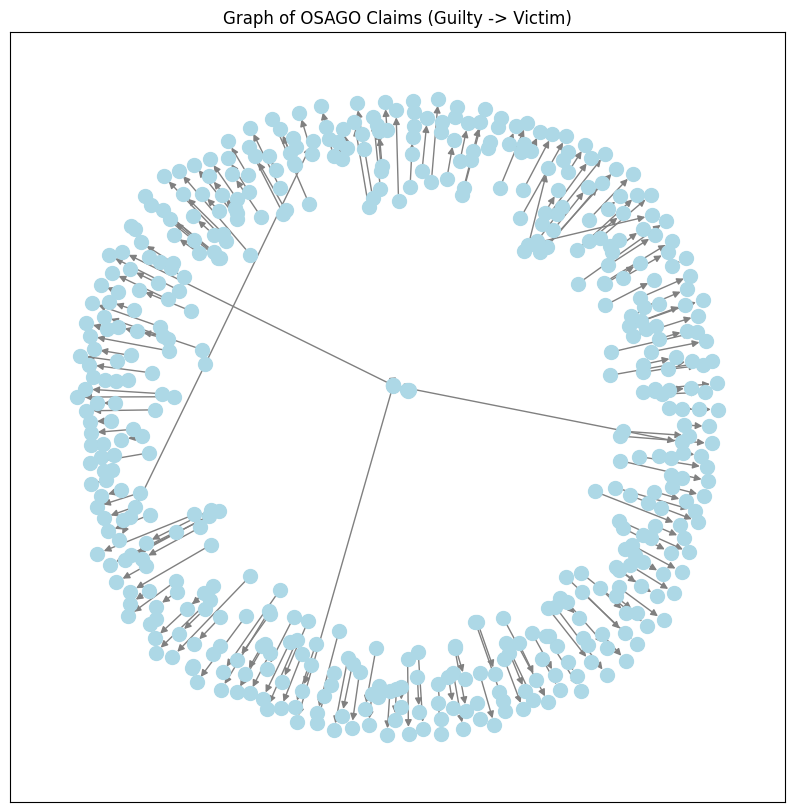

In [22]:
# Отображение графа
plt.figure(figsize=(10, 10))
nx.draw_networkx(G, with_labels=False, node_size=100, node_color="lightblue", font_size=8, font_weight="bold", edge_color="gray")
plt.title("Graph of OSAGO Claims (Guilty -> Victim)")
plt.show()

In [18]:
# Подсчет количества инцидентов для каждого участника
from collections import Counter
guilty_counts = Counter(claims_df['guilty'])
victim_counts = Counter(claims_df['victim'])
total_counts = guilty_counts + victim_counts

In [19]:
# Поиск участников, вовлеченных в 3 или более инцидента
high_risk_participants = [participant for participant, count in total_counts.items() if count >= 3]

# Слияние данных по страховым случаям и авто для вычисления сумм убытков
merged_data = pd.merge(claims_df, auto_df, left_on='num_claims', right_on='num_ts')

# Фильтрация данных по высокорисковым участникам
high_risk_data = merged_data[(merged_data['guilty'].isin(high_risk_participants)) | (merged_data['victim'].isin(high_risk_participants))]

# Группировка данных по участникам и расчет суммы убытков
high_risk_payouts = high_risk_data.groupby(['guilty', 'victim'])['sum'].sum().reset_index()


In [20]:
# Вывод таблицы с высокорисковыми участниками и колвом инцидентов
high_risk_counts

[('Дорофеева Гулия Николаевна', 5),
 ('Котова Виктория Архиповна', 3),
 ('Мамонтов Мстислав Георгиевич', 3)]

In [21]:
# Вывод таблицы с высокорисковыми участниками и суммой выплат
from google.colab.data_table import DataTable
DataTable(high_risk_payouts)

# Отображение таблицы
print(high_risk_payouts)

                       guilty                         victim     sum
0  Дорофеева Гулия Николаевна    Пахомов Анатолий Васильевич  164568
1   Котова Виктория Архиповна  Цветков Валерий Ростиславович  264564
